In [1]:
# Библиотеки
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Чтоб числа вещественные выводились норм
pd.options.display.float_format ='{:,.2f}'.format

In [2]:
# sklearn.model_selection.GridSearchCV

**Загружаем данные**

In [3]:
df_2019_full = pd.read_csv('database/df_2019_full.csv')
df_2020_full = pd.read_csv('database/df_2020_full.csv')
df_2021_full = pd.read_csv('database/df_2021_full.csv')

df_2019_part = pd.read_csv('database/df_2019_part.csv')
df_2020_part = pd.read_csv('database/df_2020_part.csv')
df_2021_part = pd.read_csv('database/df_2021_part.csv')

In [4]:
target_2019_01_full = pd.read_csv('database/target_2019_01_full.csv')
target_2019_01_full = target_2019_01_full['target_2019 01']

target_2020_01_full = pd.read_csv('database/target_2020_01_full.csv')
target_2020_01_full = target_2020_01_full['target_2020 01']

target_2021_01_full = pd.read_csv('database/target_2021_01_full.csv')
target_2021_01_full = target_2021_01_full['target_2021 01']


target_2019_01_part = pd.read_csv('database/target_2019_01_part.csv')
target_2019_01_part = target_2019_01_part['target_2019 01']

target_2020_01_part = pd.read_csv('database/target_2020_01_part.csv')
target_2020_01_part = target_2020_01_part['target_2020 01']

target_2021_01_part = pd.read_csv('database/target_2021_01_part.csv')
target_2021_01_part = target_2021_01_part['target_2021 01']

**Считываем файлы со списками признаков**

Создадим словарь, в котором ключи имя файла, а значения:
- fs_zero - список признаков нулевой значимости, отобраный библеотекой Feature selector 
- fs_collinear - список признаков, отобранных для удаленния, имеющие высокую коореляцию
- 'f_for_pastreded_client_2020' - 'f_for_pastreded_client_2021' - признаки клиентов, с которыми долго сотрудничают, т.е. есть по ним такие данные
- остальные - списки признаков, ранжированные разными методами (важные - в начале)



In [5]:
importances_feature_19 = {}

for name_file in os.listdir('feature_list/2019'):
    path_to_file = 'feature_list/2019/' + name_file
    name_file = name_file.strip('.txt')
    file = open(path_to_file, 'r')
    importances_feature_19[name_file] = [line.strip() for line in file]
    file.close()
    
importances_feature_19.keys()

dict_keys(['fs_collinear', 'fs_importances', 'fs_zero', 'f_cl_importances', 'f_lr_importances', 'f_mi_importances', 'f_pi_f1_importances', 'f_pi_ra_importances', 'f_rfe_importances'])

In [6]:
importances_feature_20 = {}

for name_file in os.listdir('feature_list/2020'):
    path_to_file = 'feature_list/2020/' + name_file
    name_file = name_file.strip('.txt')
    file = open('feature_list/2019/f_rfe_importances.txt', 'r')
    importances_feature_20[name_file] = [line.strip() for line in file]
    file.close()
    
importances_feature_20.keys()

dict_keys(['fs_collinear', 'fs_importances', 'fs_zero', 'f_cl_importances', 'f_lr_importances', 'f_mi_importances', 'f_pi_f1_importances', 'f_pi_ra_importances', 'f_rfe_importances'])

In [7]:
# Считаем список признаков для клиентов, которыми давно работают
file = open('feature_list/f_for_pastreded_client.txt', 'r')
list_f_for_pastreded_client = [line.strip() for line in file]
file.close()

**Тестирование разных моделей ML**

In [8]:
# Импортирование необходимых модулей и атрибутов
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score

Линейные алгоритмы:

    — Логистическая регрессия* / Logistic Regression (‘LR’)
    — Линейный дискриминантный анализ / Linear Discriminant Analysis (‘LDA’)

Нелинейные алгоритмы:

    — Метод k-ближайших соседей (классификация) / K-Neighbors Classifier (‘KNN’)
    — Деревья принятия решений / Decision Tree Classifier (‘CART’)
    — Наивный классификатор Байеса / Naive Bayes Classifier (‘NB’)
    — Линейный метод опорных векторов (классификация) / Linear Support Vector Classification (‘LSVC’)
    — Метод опорных векторов (классификация) / C-Support Vector Classification (‘SVC’)

Алгоритм искусственной нейронной сети:

    — Многослойный персептрон / Multilayer Perceptrons (‘MLP’)

Ансамблевые алгоритмы:

    — Bagging (классификация) / Bagging Classifier (‘BG’) (Bagging = Bootstrap aggregating)
    — Случайный лес (классификация) / Random Forest Classifier (‘RF’)
    — Экстра-деревья (классификация) / Extra Trees Classifier (‘ET’)
    — AdaBoost (классификация) / AdaBoost Classifier (‘AB’) (AdaBoost = Adaptive Boosting)
    — Градиентный boosting (классификация) / Gradient Boosting Classifier (‘GB’)

Таким образом, список ‘models’ содержит следующие модели:


In [9]:
# На будущее автоматизировать функцию ml_tester
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier(random_state=42)))
# models.append(('NB', GaussianNB()))
# models.append(('LSVC', LinearSVC(random_state=42)))
# models.append(('SVC', SVC(random_state=42)))
# models.append(('MLP', MLPClassifier(random_state=42)))
# models.append(('BG', BaggingClassifier(n_estimators=100, random_state=42)))
# models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=42)))
# models.append(('ET', ExtraTreesClassifier(n_estimators=100, random_state=42)))
# models.append(('AB', AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)))
# models.append(('GB', GradientBoostingClassifier(n_estimators=100, random_state=42)))

In [10]:
def metrics(y_test, y_pred):
    """Комплексный расчет метрик"""
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred).round(4)
    recall = recall_score(y_test, y_pred).round(4)
    roc_auc = roc_auc_score(y_test, y_pred).round(4)
    f1 = f1_score(y_test, y_pred).round(4)
    
    # Если необходимо вывести метрики на печать - раскомментировать
    #print('Матрица:')
    #print(conf_matrix)
    #print('точность (precision) - ', precision)
    #print('полнота (recall) -', recall)
    #print('roc_auc - ', roc_auc)
    #print('f1_score - ', f1)
    
    return {'conf_matrix': conf_matrix, 'precision': precision, 'recall': recall, 'roc_auc': roc_auc, 'f1': f1}

In [11]:
def ml_train(ml, X_train, X_test, y_train,  y_test):
    """Функция обучает переданную ей модель и считает метрики"""
    ml.fit(X_train, y_train)
    y_pred = ml.predict(X_test)
    return metrics(y_test, y_pred)
   

In [12]:
# Оценивание эффективности выполнения каждого алгоритма

def ml_tester(X_train, X_test, y_train, y_test, features_list):
    """Функция проводит обучение на разных моделях, и возвращает метрики
    feature - список признаков,
    n_feature - количество признаков, которые необходимо взять для обучения модели
    """
    
    X_train = X_train[features_list]
    X_test = X_test[features_list]
    
    metrixs_list = {}
    
    # Список моделей машинного обучения
    ml_LR = LogisticRegression( max_iter=2000, random_state=42)
    metrixs_list['ml_LR'] = ml_train(ml_LR, X_train, X_test, y_train, y_test)
    
    ml_LDA = LinearDiscriminantAnalysis()
    metrixs_list['ml_LDA'] = ml_train(ml_LDA, X_train, X_test, y_train, y_test)
    
    ml_KNN = KNeighborsClassifier()
    metrixs_list['ml_KNN'] = ml_train(ml_KNN, X_train, X_test, y_train, y_test)
    
    ml_CART = DecisionTreeClassifier(random_state=42)
    metrixs_list['ml_CART'] = ml_train(ml_CART, X_train, X_test, y_train, y_test)
    
    ml_NB = GaussianNB()
    metrixs_list['ml_NB'] = ml_train(ml_NB, X_train, X_test, y_train, y_test)
    
    ml_LSVC = LinearSVC(max_iter=100000, random_state=42)
    metrixs_list['ml_LSVC'] = ml_train(ml_LSVC, X_train, X_test, y_train, y_test)
    
    ml_SVC = SVC(random_state=42)
    metrixs_list['ml_SVC'] = ml_train(ml_SVC, X_train, X_test, y_train, y_test)
    
    ml_MLP = MLPClassifier(max_iter=2000, random_state=42)
    metrixs_list['ml_MLP'] = ml_train(ml_MLP, X_train, X_test, y_train, y_test)
    
    ml_BG = BaggingClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_BG'] = ml_train(ml_BG, X_train, X_test, y_train, y_test)
    
    ml_RF = RandomForestClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_RF'] = ml_train(ml_RF, X_train, X_test, y_train, y_test)
    
    ml_ET = ExtraTreesClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_ET'] = ml_train(ml_ET, X_train, X_test, y_train, y_test)
    
    ml_AB = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
    metrixs_list['ml_AB'] = ml_train(ml_AB, X_train, X_test, y_train, y_test)
    
    ml_GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_GB'] = ml_train(ml_GB, X_train, X_test, y_train, y_test)

    return metrixs_list


**Проведем тест обучения разных моделей ML разных наборах признаков.**

Только теперь попробуем модели ML четко показать кто хронически не платит вовремя, а кто всегда платит во время. Отбор таких контрагентов в 1 части по всем годам (2019-2021). Файлы датасетов включают в названии 'part'.

Тестировать будем модель на полных данных. Файлы датасетов включают в названии 'pull'.

Обучаем на df_2019 - тестим на df_2020 & Обучаем на df_2020 - тестим на df_2021

In [13]:
features_list = ['f_cl_importances', 'f_lr_importances', 'f_mi_importances', 'f_pi_f1_importances',
                 'f_pi_ra_importances', 'f_rfe_importances', 'fs_importances']
n = 45 # Количество признаков

ml_test_dict = {} # Словарь с метриками. Ключ: название метрики, Значение: Датафрейм с метриками

for feature in  features_list:
    print(f'Обучение на отборе {n} признаков из {feature}')
    metrixs_19_20 = ml_tester(df_2019_part, df_2020_full, target_2019_01_part, target_2020_01_full, 
                          importances_feature_19[feature][:n])
    metrixs_20_21 = ml_tester(df_2020_part, df_2021_full, target_2020_01_part, target_2021_01_full, 
                          importances_feature_20[feature][:n])
    
    df_metrixs_19_20 = pd.DataFrame(metrixs_19_20).T
    df_metrixs_20_21 = pd.DataFrame(metrixs_20_21).T
    df_metrixs_concatf = pd.concat([df_metrixs_19_20, df_metrixs_20_21], axis=1)
    ml_test_dict[feature] = df_metrixs_concatf
    display(df_metrixs_concatf)

Обучение на отборе 45 признаков из f_cl_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[42, 36], [107, 140]]",0.80,0.57,0.55,0.66,"[[92, 122], [23, 88]]",0.42,0.79,0.61,0.55
ml_LDA,"[[40, 38], [77, 170]]",0.82,0.69,0.60,0.75,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[34, 44], [106, 141]]",0.76,0.57,0.50,0.65,"[[119, 95], [35, 76]]",0.44,0.68,0.62,0.54
ml_CART,"[[46, 32], [91, 156]]",0.83,0.63,0.61,0.72,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[64, 14], [199, 48]]",0.77,0.19,0.51,0.31,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[41, 37], [97, 150]]",0.80,0.61,0.57,0.69,"[[89, 125], [25, 86]]",0.41,0.77,0.60,0.53
ml_SVC,"[[17, 61], [32, 215]]",0.78,0.87,0.54,0.82,"[[0, 214], [0, 111]]",0.34,1.00,0.50,0.51
ml_MLP,"[[41, 37], [131, 116]]",0.76,0.47,0.50,0.58,"[[94, 120], [23, 88]]",0.42,0.79,0.62,0.55
ml_BG,"[[34, 44], [84, 163]]",0.79,0.66,0.55,0.72,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[38, 40], [77, 170]]",0.81,0.69,0.59,0.74,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Обучение на отборе 45 признаков из f_lr_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[39, 39], [109, 138]]",0.78,0.56,0.53,0.65,"[[92, 122], [23, 88]]",0.42,0.79,0.61,0.55
ml_LDA,"[[36, 42], [100, 147]]",0.78,0.60,0.53,0.67,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[30, 48], [91, 156]]",0.76,0.63,0.51,0.69,"[[119, 95], [35, 76]]",0.44,0.68,0.62,0.54
ml_CART,"[[39, 39], [105, 142]]",0.78,0.57,0.54,0.66,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[53, 25], [178, 69]]",0.73,0.28,0.48,0.40,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[32, 46], [91, 156]]",0.77,0.63,0.52,0.69,"[[89, 125], [25, 86]]",0.41,0.77,0.60,0.53
ml_SVC,"[[0, 78], [0, 247]]",0.76,1.00,0.50,0.86,"[[0, 214], [0, 111]]",0.34,1.00,0.50,0.51
ml_MLP,"[[38, 40], [84, 163]]",0.80,0.66,0.57,0.72,"[[94, 120], [23, 88]]",0.42,0.79,0.62,0.55
ml_BG,"[[36, 42], [63, 184]]",0.81,0.74,0.60,0.78,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[32, 46], [57, 190]]",0.81,0.77,0.59,0.79,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Обучение на отборе 45 признаков из f_mi_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[41, 37], [124, 123]]",0.77,0.50,0.51,0.60,"[[92, 122], [23, 88]]",0.42,0.79,0.61,0.55
ml_LDA,"[[39, 39], [101, 146]]",0.79,0.59,0.55,0.68,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[27, 51], [87, 160]]",0.76,0.65,0.50,0.70,"[[119, 95], [35, 76]]",0.44,0.68,0.62,0.54
ml_CART,"[[35, 43], [93, 154]]",0.78,0.62,0.54,0.69,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[68, 10], [217, 30]]",0.75,0.12,0.50,0.21,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[42, 36], [127, 120]]",0.77,0.49,0.51,0.60,"[[89, 125], [25, 86]]",0.41,0.77,0.60,0.53
ml_SVC,"[[1, 77], [1, 246]]",0.76,1.00,0.50,0.86,"[[0, 214], [0, 111]]",0.34,1.00,0.50,0.51
ml_MLP,"[[34, 44], [79, 168]]",0.79,0.68,0.56,0.73,"[[94, 120], [23, 88]]",0.42,0.79,0.62,0.55
ml_BG,"[[30, 48], [71, 176]]",0.79,0.71,0.55,0.75,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[34, 44], [71, 176]]",0.80,0.71,0.57,0.75,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Обучение на отборе 45 признаков из f_pi_f1_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[39, 39], [112, 135]]",0.78,0.55,0.52,0.64,"[[92, 122], [23, 88]]",0.42,0.79,0.61,0.55
ml_LDA,"[[41, 37], [121, 126]]",0.77,0.51,0.52,0.61,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[38, 40], [88, 159]]",0.80,0.64,0.57,0.71,"[[119, 95], [35, 76]]",0.44,0.68,0.62,0.54
ml_CART,"[[57, 21], [113, 134]]",0.86,0.54,0.64,0.67,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[32, 46], [74, 173]]",0.79,0.70,0.56,0.74,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[40, 38], [113, 134]]",0.78,0.54,0.53,0.64,"[[89, 125], [25, 86]]",0.41,0.77,0.60,0.53
ml_SVC,"[[0, 78], [0, 247]]",0.76,1.00,0.50,0.86,"[[0, 214], [0, 111]]",0.34,1.00,0.50,0.51
ml_MLP,"[[39, 39], [98, 149]]",0.79,0.60,0.55,0.69,"[[94, 120], [23, 88]]",0.42,0.79,0.62,0.55
ml_BG,"[[42, 36], [75, 172]]",0.83,0.70,0.62,0.76,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[32, 46], [54, 193]]",0.81,0.78,0.60,0.79,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Обучение на отборе 45 признаков из f_pi_ra_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[39, 39], [119, 128]]",0.77,0.52,0.51,0.62,"[[92, 122], [23, 88]]",0.42,0.79,0.61,0.55
ml_LDA,"[[36, 42], [96, 151]]",0.78,0.61,0.54,0.69,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[26, 52], [77, 170]]",0.77,0.69,0.51,0.72,"[[119, 95], [35, 76]]",0.44,0.68,0.62,0.54
ml_CART,"[[33, 45], [61, 186]]",0.81,0.75,0.59,0.78,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[46, 32], [120, 127]]",0.80,0.51,0.55,0.63,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[42, 36], [119, 128]]",0.78,0.52,0.53,0.62,"[[89, 125], [25, 86]]",0.41,0.77,0.60,0.53
ml_SVC,"[[0, 78], [0, 247]]",0.76,1.00,0.50,0.86,"[[0, 214], [0, 111]]",0.34,1.00,0.50,0.51
ml_MLP,"[[40, 38], [108, 139]]",0.79,0.56,0.54,0.66,"[[94, 120], [23, 88]]",0.42,0.79,0.62,0.55
ml_BG,"[[32, 46], [65, 182]]",0.80,0.74,0.57,0.77,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[30, 48], [50, 197]]",0.80,0.80,0.59,0.80,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Обучение на отборе 45 признаков из f_rfe_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[39, 39], [107, 140]]",0.78,0.57,0.53,0.66,"[[92, 122], [23, 88]]",0.42,0.79,0.61,0.55
ml_LDA,"[[35, 43], [83, 164]]",0.79,0.66,0.56,0.72,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[30, 48], [71, 176]]",0.79,0.71,0.55,0.75,"[[119, 95], [35, 76]]",0.44,0.68,0.62,0.54
ml_CART,"[[41, 37], [106, 141]]",0.79,0.57,0.55,0.66,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[42, 36], [99, 148]]",0.80,0.60,0.57,0.69,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[36, 42], [101, 146]]",0.78,0.59,0.53,0.67,"[[89, 125], [25, 86]]",0.41,0.77,0.60,0.53
ml_SVC,"[[0, 78], [0, 247]]",0.76,1.00,0.50,0.86,"[[0, 214], [0, 111]]",0.34,1.00,0.50,0.51
ml_MLP,"[[33, 45], [86, 161]]",0.78,0.65,0.54,0.71,"[[94, 120], [23, 88]]",0.42,0.79,0.62,0.55
ml_BG,"[[43, 35], [68, 179]]",0.84,0.72,0.64,0.78,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[38, 40], [65, 182]]",0.82,0.74,0.61,0.78,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Обучение на отборе 45 признаков из fs_importances


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[40, 38], [122, 125]]",0.77,0.51,0.51,0.61,"[[92, 122], [23, 88]]",0.42,0.79,0.61,0.55
ml_LDA,"[[40, 38], [106, 141]]",0.79,0.57,0.54,0.66,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[27, 51], [80, 167]]",0.77,0.68,0.51,0.72,"[[119, 95], [35, 76]]",0.44,0.68,0.62,0.54
ml_CART,"[[33, 45], [83, 164]]",0.78,0.66,0.54,0.72,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[51, 27], [124, 123]]",0.82,0.50,0.58,0.62,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[40, 38], [114, 133]]",0.78,0.54,0.53,0.64,"[[89, 125], [25, 86]]",0.41,0.77,0.60,0.53
ml_SVC,"[[0, 78], [0, 247]]",0.76,1.00,0.50,0.86,"[[0, 214], [0, 111]]",0.34,1.00,0.50,0.51
ml_MLP,"[[42, 36], [105, 142]]",0.80,0.57,0.56,0.67,"[[94, 120], [23, 88]]",0.42,0.79,0.62,0.55
ml_BG,"[[40, 38], [77, 170]]",0.82,0.69,0.60,0.75,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[35, 43], [73, 174]]",0.80,0.70,0.58,0.75,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Качество метрики по прогнозам на 2021г. выросло. А вот на 2020 упало. 

Т.е. получается, что в стабильной ситуации лучше работает обогащенный вариант (там, где присутствую разные категории: всегда во время платят,  ежегодно имеют просрочку, и год на год не приходится.)

А вот когда нестабильная и метрики, особенно точность в 2 раза меньше, лучше сработал вариант четкого разделения. Я понимаю, что осталось всего 88 объектов и это очень мало, но с другой стороны модели лучше уловили взаимосвязи.

In [14]:
#  Так мы можем получить метрики по любому набору признаков
pd.DataFrame(ml_test_dict['f_lr_importances'])

,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[39, 39], [109, 138]]",0.78,0.56,0.53,0.65,"[[92, 122], [23, 88]]",0.42,0.79,0.61,0.55
ml_LDA,"[[36, 42], [100, 147]]",0.78,0.60,0.53,0.67,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[30, 48], [91, 156]]",0.76,0.63,0.51,0.69,"[[119, 95], [35, 76]]",0.44,0.68,0.62,0.54
ml_CART,"[[39, 39], [105, 142]]",0.78,0.57,0.54,0.66,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[53, 25], [178, 69]]",0.73,0.28,0.48,0.40,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[32, 46], [91, 156]]",0.77,0.63,0.52,0.69,"[[89, 125], [25, 86]]",0.41,0.77,0.60,0.53
ml_SVC,"[[0, 78], [0, 247]]",0.76,1.00,0.50,0.86,"[[0, 214], [0, 111]]",0.34,1.00,0.50,0.51
ml_MLP,"[[38, 40], [84, 163]]",0.80,0.66,0.57,0.72,"[[94, 120], [23, 88]]",0.42,0.79,0.62,0.55
ml_BG,"[[36, 42], [63, 184]]",0.81,0.74,0.60,0.78,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[32, 46], [57, 190]]",0.81,0.77,0.59,0.79,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Теперь у нас на графики метрики поперемешались. Одни 2021 подросли, а 2020 просели. 

Яркие, 4 шт метрики это 2019 => 2020, Пастельные, 4 шт 2020 => 2021

D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Метрики по набору признаков из: f_lr__importances '}>

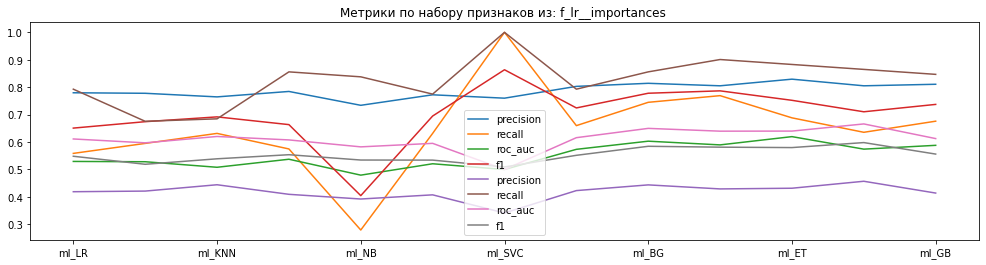

In [15]:
pd.DataFrame(ml_test_dict['f_lr_importances']).plot(title='Метрики по набору признаков из: f_lr__importances ', figsize=(17, 4))


Проверим метрики на стандартизированных признаках

In [16]:
def ml_ss_tester(X_train, X_test, y_train, y_test, features_list):
    """Функция проводит обучение на разных моделях, и возвращает метрики
    features_list - список признаков,
    
    """
    
    X_train = X_train[features_list]
    X_test = X_test[features_list]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    metrixs_list = {}
    
    # Список моделей машинного обучения
    ml_LR = LogisticRegression( max_iter=2000, random_state=42)
    metrixs_list['ml_LR'] = ml_train(ml_LR, X_train, X_test, y_train, y_test)
    
    ml_LDA = LinearDiscriminantAnalysis()
    metrixs_list['ml_LDA'] = ml_train(ml_LDA, X_train, X_test, y_train, y_test)
    
    ml_KNN = KNeighborsClassifier()
    metrixs_list['ml_KNN'] = ml_train(ml_KNN, X_train, X_test, y_train, y_test)
    
    ml_CART = DecisionTreeClassifier(random_state=42)
    metrixs_list['ml_CART'] = ml_train(ml_CART, X_train, X_test, y_train, y_test)
    
    ml_NB = GaussianNB()
    metrixs_list['ml_NB'] = ml_train(ml_NB, X_train, X_test, y_train, y_test)
    
    ml_LSVC = LinearSVC(max_iter=100000, random_state=42)
    metrixs_list['ml_LSVC'] = ml_train(ml_LSVC, X_train, X_test, y_train, y_test)
    
    ml_SVC = SVC(random_state=42)
    metrixs_list['ml_SVC'] = ml_train(ml_SVC, X_train, X_test, y_train, y_test)
    
    ml_MLP = MLPClassifier(max_iter=2000, random_state=42)
    metrixs_list['ml_MLP'] = ml_train(ml_MLP, X_train, X_test, y_train, y_test)
    
    ml_BG = BaggingClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_BG'] = ml_train(ml_BG, X_train, X_test, y_train, y_test)
    
    ml_RF = RandomForestClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_RF'] = ml_train(ml_RF, X_train, X_test, y_train, y_test)
    
    ml_ET = ExtraTreesClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_ET'] = ml_train(ml_ET, X_train, X_test, y_train, y_test)
    
    ml_AB = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
    metrixs_list['ml_AB'] = ml_train(ml_AB, X_train, X_test, y_train, y_test)
    
    ml_GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
    metrixs_list['ml_GB'] = ml_train(ml_GB, X_train, X_test, y_train, y_test)

    return metrixs_list

In [17]:
features_list = ['f_cl_importances', 'f_lr_importances', 'f_mi_importances', 'f_pi_f1_importances',
                 'f_pi_ra_importances', 'f_rfe_importances', 'fs_importances']
n=45 # Количество признаков

ml_test_stand_dict_ = {} # Словарь с метриками. Ключ: название метрики, Значение: Датафрейм с метриками

for feature in  features_list:
    print(f'Обучение стандартизированных данных на отборе {n} признаков из {feature}')
    metrixs_19_20 = ml_ss_tester(df_2019_part, df_2020_full, target_2019_01_part, target_2020_01_full, 
                          importances_feature_19[feature][:n])
    metrixs_20_21 = ml_ss_tester(df_2020_part, df_2021_full, target_2020_01_part, target_2021_01_full, 
                          importances_feature_20[feature][:n])
    
    df_metrixs_19_20 = pd.DataFrame(metrixs_19_20).T
    df_metrixs_20_21 = pd.DataFrame(metrixs_20_21).T
    df_metrixs_concatf = pd.concat([df_metrixs_19_20, df_metrixs_20_21], axis=1)
    ml_test_stand_dict_[feature] = df_metrixs_concatf
    display(df_metrixs_concatf)

Обучение стандартизированных данных на отборе 45 признаков из f_cl_importances


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[42, 36], [98, 149]]",0.81,0.60,0.57,0.69,"[[95, 119], [15, 96]]",0.45,0.86,0.65,0.59
ml_LDA,"[[40, 38], [77, 170]]",0.82,0.69,0.60,0.75,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[37, 41], [104, 143]]",0.78,0.58,0.53,0.66,"[[96, 118], [31, 80]]",0.40,0.72,0.58,0.52
ml_CART,"[[46, 32], [91, 156]]",0.83,0.63,0.61,0.72,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[61, 17], [188, 59]]",0.78,0.24,0.51,0.37,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[42, 36], [104, 143]]",0.80,0.58,0.56,0.67,"[[100, 114], [27, 84]]",0.42,0.76,0.61,0.54
ml_SVC,"[[28, 50], [56, 191]]",0.79,0.77,0.57,0.78,"[[66, 148], [10, 101]]",0.41,0.91,0.61,0.56
ml_MLP,"[[40, 38], [90, 157]]",0.81,0.64,0.57,0.71,"[[107, 107], [23, 88]]",0.45,0.79,0.65,0.58
ml_BG,"[[36, 42], [86, 161]]",0.79,0.65,0.56,0.72,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[37, 41], [76, 171]]",0.81,0.69,0.58,0.75,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Обучение стандартизированных данных на отборе 45 признаков из f_lr_importances


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[42, 36], [109, 138]]",0.79,0.56,0.55,0.66,"[[95, 119], [15, 96]]",0.45,0.86,0.65,0.59
ml_LDA,"[[36, 42], [100, 147]]",0.78,0.60,0.53,0.67,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[34, 44], [98, 149]]",0.77,0.60,0.52,0.68,"[[96, 118], [31, 80]]",0.40,0.72,0.58,0.52
ml_CART,"[[39, 39], [105, 142]]",0.78,0.57,0.54,0.66,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[53, 25], [182, 65]]",0.72,0.26,0.47,0.39,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[46, 32], [108, 139]]",0.81,0.56,0.58,0.67,"[[100, 114], [27, 84]]",0.42,0.76,0.61,0.54
ml_SVC,"[[32, 46], [101, 146]]",0.76,0.59,0.50,0.67,"[[66, 148], [10, 101]]",0.41,0.91,0.61,0.56
ml_MLP,"[[41, 37], [105, 142]]",0.79,0.57,0.55,0.67,"[[107, 107], [23, 88]]",0.45,0.79,0.65,0.58
ml_BG,"[[36, 42], [63, 184]]",0.81,0.74,0.60,0.78,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[32, 46], [57, 190]]",0.81,0.77,0.59,0.79,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Обучение стандартизированных данных на отборе 45 признаков из f_mi_importances


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[38, 40], [116, 131]]",0.77,0.53,0.51,0.63,"[[95, 119], [15, 96]]",0.45,0.86,0.65,0.59
ml_LDA,"[[39, 39], [101, 146]]",0.79,0.59,0.55,0.68,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[32, 46], [97, 150]]",0.77,0.61,0.51,0.68,"[[96, 118], [31, 80]]",0.40,0.72,0.58,0.52
ml_CART,"[[35, 43], [93, 154]]",0.78,0.62,0.54,0.69,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[70, 8], [220, 27]]",0.77,0.11,0.50,0.19,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[43, 35], [114, 133]]",0.79,0.54,0.54,0.64,"[[100, 114], [27, 84]]",0.42,0.76,0.61,0.54
ml_SVC,"[[26, 52], [100, 147]]",0.74,0.60,0.46,0.66,"[[66, 148], [10, 101]]",0.41,0.91,0.61,0.56
ml_MLP,"[[39, 39], [103, 144]]",0.79,0.58,0.54,0.67,"[[107, 107], [23, 88]]",0.45,0.79,0.65,0.58
ml_BG,"[[32, 46], [73, 174]]",0.79,0.70,0.56,0.75,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[33, 45], [69, 178]]",0.80,0.72,0.57,0.76,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Обучение стандартизированных данных на отборе 45 признаков из f_pi_f1_importances


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[37, 41], [108, 139]]",0.77,0.56,0.52,0.65,"[[95, 119], [15, 96]]",0.45,0.86,0.65,0.59
ml_LDA,"[[41, 37], [121, 126]]",0.77,0.51,0.52,0.61,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[30, 48], [65, 182]]",0.79,0.74,0.56,0.76,"[[96, 118], [31, 80]]",0.40,0.72,0.58,0.52
ml_CART,"[[57, 21], [113, 134]]",0.86,0.54,0.64,0.67,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[32, 46], [74, 173]]",0.79,0.70,0.56,0.74,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[37, 41], [113, 134]]",0.77,0.54,0.51,0.64,"[[100, 114], [27, 84]]",0.42,0.76,0.61,0.54
ml_SVC,"[[18, 60], [25, 222]]",0.79,0.90,0.56,0.84,"[[66, 148], [10, 101]]",0.41,0.91,0.61,0.56
ml_MLP,"[[39, 39], [102, 145]]",0.79,0.59,0.54,0.67,"[[107, 107], [23, 88]]",0.45,0.79,0.65,0.58
ml_BG,"[[42, 36], [75, 172]]",0.83,0.70,0.62,0.76,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[32, 46], [54, 193]]",0.81,0.78,0.60,0.79,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Обучение стандартизированных данных на отборе 45 признаков из f_pi_ra_importances


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[40, 38], [102, 145]]",0.79,0.59,0.55,0.67,"[[95, 119], [15, 96]]",0.45,0.86,0.65,0.59
ml_LDA,"[[36, 42], [96, 151]]",0.78,0.61,0.54,0.69,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[30, 48], [70, 177]]",0.79,0.72,0.55,0.75,"[[96, 118], [31, 80]]",0.40,0.72,0.58,0.52
ml_CART,"[[33, 45], [61, 186]]",0.81,0.75,0.59,0.78,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[46, 32], [120, 127]]",0.80,0.51,0.55,0.63,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[38, 40], [110, 137]]",0.77,0.55,0.52,0.65,"[[100, 114], [27, 84]]",0.42,0.76,0.61,0.54
ml_SVC,"[[24, 54], [47, 200]]",0.79,0.81,0.56,0.80,"[[66, 148], [10, 101]]",0.41,0.91,0.61,0.56
ml_MLP,"[[39, 39], [106, 141]]",0.78,0.57,0.54,0.66,"[[107, 107], [23, 88]]",0.45,0.79,0.65,0.58
ml_BG,"[[31, 47], [66, 181]]",0.79,0.73,0.57,0.76,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[31, 47], [50, 197]]",0.81,0.80,0.60,0.80,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Обучение стандартизированных данных на отборе 45 признаков из f_rfe_importances


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[41, 37], [93, 154]]",0.81,0.62,0.57,0.70,"[[95, 119], [15, 96]]",0.45,0.86,0.65,0.59
ml_LDA,"[[35, 43], [83, 164]]",0.79,0.66,0.56,0.72,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[39, 39], [90, 157]]",0.80,0.64,0.57,0.71,"[[96, 118], [31, 80]]",0.40,0.72,0.58,0.52
ml_CART,"[[41, 37], [106, 141]]",0.79,0.57,0.55,0.66,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[42, 36], [99, 148]]",0.80,0.60,0.57,0.69,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[39, 39], [99, 148]]",0.79,0.60,0.55,0.68,"[[100, 114], [27, 84]]",0.42,0.76,0.61,0.54
ml_SVC,"[[31, 47], [52, 195]]",0.81,0.79,0.59,0.80,"[[66, 148], [10, 101]]",0.41,0.91,0.61,0.56
ml_MLP,"[[40, 38], [86, 161]]",0.81,0.65,0.58,0.72,"[[107, 107], [23, 88]]",0.45,0.79,0.65,0.58
ml_BG,"[[43, 35], [68, 179]]",0.84,0.72,0.64,0.78,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[38, 40], [65, 182]]",0.82,0.74,0.61,0.78,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Обучение стандартизированных данных на отборе 45 признаков из fs_importances


,conf_matrix,precision,recall,roc_auc,f1,conf_matrix,precision,recall,roc_auc,f1
ml_LR,"[[48, 30], [119, 128]]",0.81,0.52,0.57,0.63,"[[95, 119], [15, 96]]",0.45,0.86,0.65,0.59
ml_LDA,"[[40, 38], [106, 141]]",0.79,0.57,0.54,0.66,"[[111, 103], [36, 75]]",0.42,0.68,0.60,0.52
ml_KNN,"[[31, 47], [76, 171]]",0.78,0.69,0.54,0.74,"[[96, 118], [31, 80]]",0.40,0.72,0.58,0.52
ml_CART,"[[33, 45], [83, 164]]",0.78,0.66,0.54,0.72,"[[77, 137], [16, 95]]",0.41,0.86,0.61,0.55
ml_NB,"[[51, 27], [124, 123]]",0.82,0.50,0.58,0.62,"[[70, 144], [18, 93]]",0.39,0.84,0.58,0.53
ml_LSVC,"[[43, 35], [117, 130]]",0.79,0.53,0.54,0.63,"[[100, 114], [27, 84]]",0.42,0.76,0.61,0.54
ml_SVC,"[[36, 42], [80, 167]]",0.80,0.68,0.57,0.73,"[[66, 148], [10, 101]]",0.41,0.91,0.61,0.56
ml_MLP,"[[45, 33], [102, 145]]",0.81,0.59,0.58,0.68,"[[107, 107], [23, 88]]",0.45,0.79,0.65,0.58
ml_BG,"[[40, 38], [77, 170]]",0.82,0.69,0.60,0.75,"[[95, 119], [16, 95]]",0.44,0.86,0.65,0.58
ml_RF,"[[35, 43], [73, 174]]",0.80,0.70,0.58,0.75,"[[81, 133], [11, 100]]",0.43,0.90,0.64,0.58


Демонстрируют такую же ситуацию, как и на нестандартизированных данных. 

Яркие, 4 шт метрики это 2019 => 2020, Пастельные, 4 шт 2020 => 2021

D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Метрики на стандартизированных данных по набору признаков из: f_lr_importances'}>

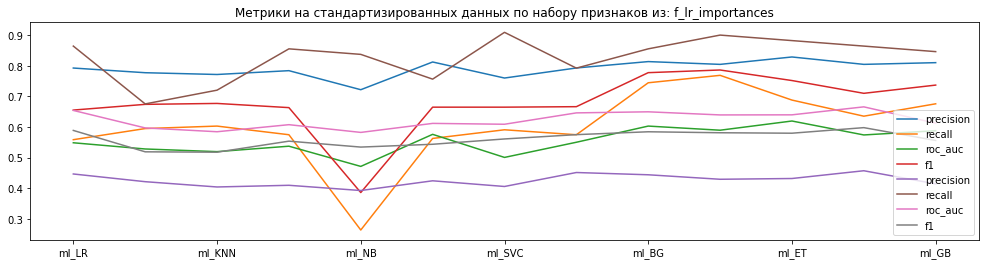

In [18]:
pd.DataFrame(ml_test_stand_dict_['f_lr_importances']).plot(title='Метрики на стандартизированных данных по набору признаков из: f_lr_importances', 
                                                           figsize=(17, 4))

**Интересно выходит. Нужно искать дополнительные внешшние данные, которые бы помогли моделям разграничить. **

**Рассмотрим какие признаки каждая модель считает наиболее важными, для этого дадим модели все признаки и посмотрим, что она выбирет**

In [19]:
# Будем рассматривать i признаков на выборке feat на data и target

feat = 'f_lr_importances'
i = 15 # количество наиболее важных признаков для отбора
data = df_2020_part
target = target_2020_01_part

# Данные будем собирать в словарь
selection_feature_of_models = {} 

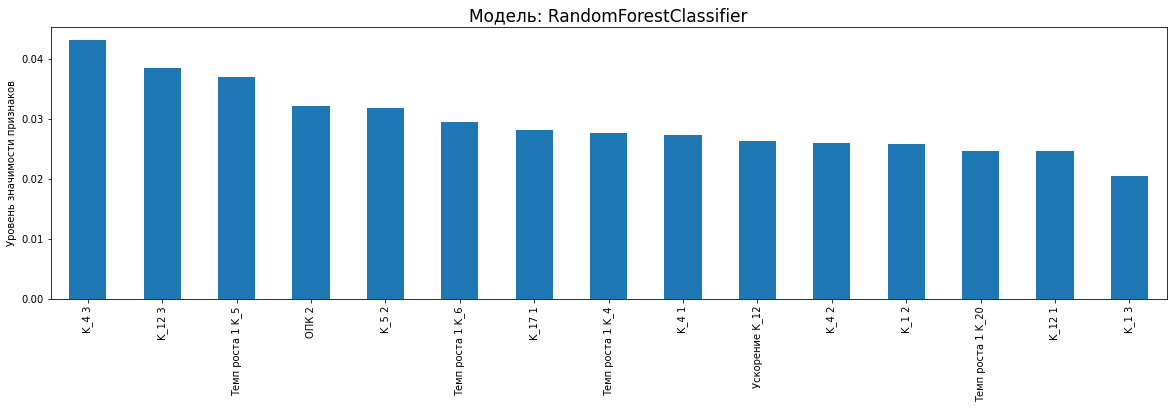

In [20]:
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(data[importances_feature_20[feat]], target)
RF_feaches = pd.Series(model_RF.feature_importances_)
RF_feaches.index = data[importances_feature_20[feat]].columns
RF_feaches = RF_feaches.sort_values(ascending=False)
selection_feature_of_models['RandomForestClassifier'] = RF_feaches

RF_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: RandomForestClassifier', fontsize = 17)
plt.show()



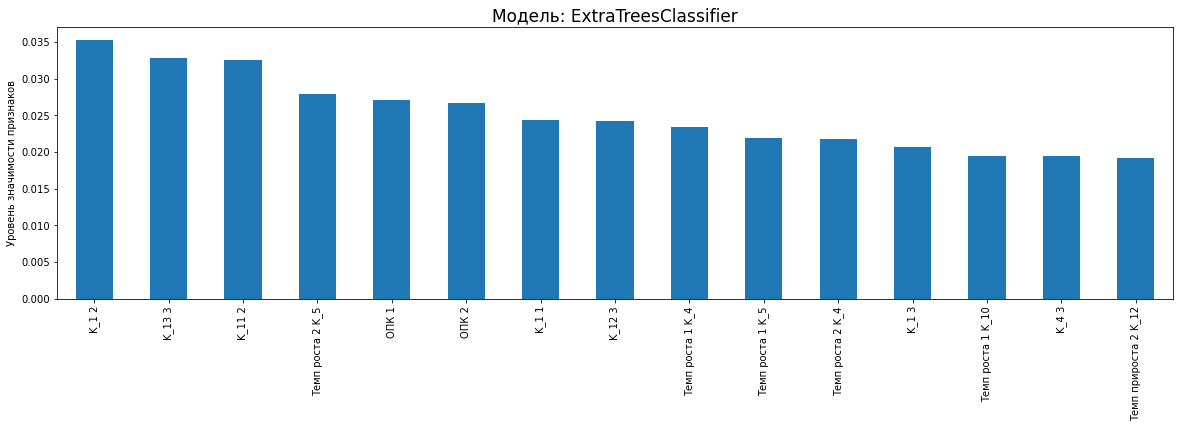

In [21]:
model_ET = ExtraTreesClassifier(n_estimators=100, random_state=42)
model_ET.fit(data[importances_feature_20[feat]], target)
ET_feaches = pd.Series(model_ET.feature_importances_)
ET_feaches.index = data[importances_feature_20[feat]].columns
ET_feaches = ET_feaches.sort_values(ascending=False)
selection_feature_of_models['ExtraTreesClassifier'] = ET_feaches

ET_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: ExtraTreesClassifier', fontsize = 17)
plt.show()

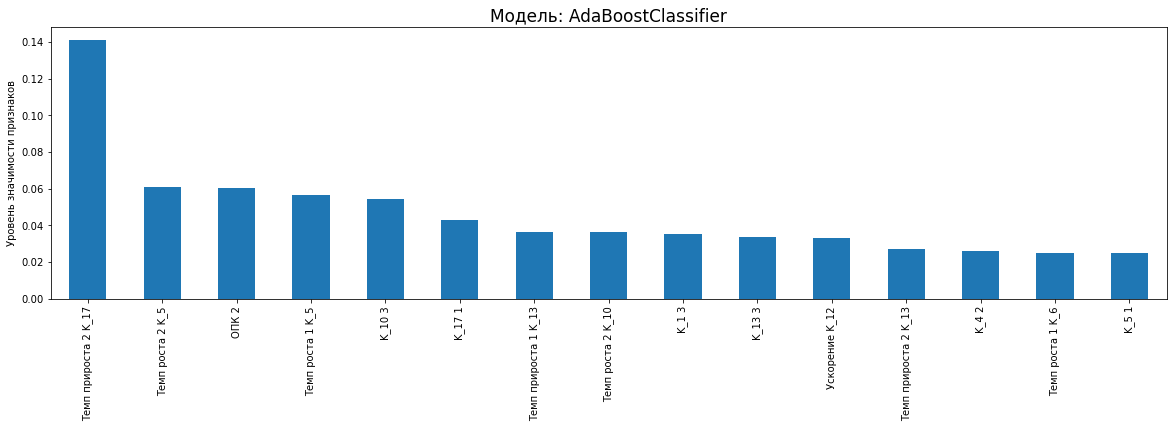

In [22]:
model_AB = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
model_AB.fit(data[importances_feature_20[feat]], target)
AB_feaches = pd.Series(model_AB.feature_importances_)
AB_feaches.index = data[importances_feature_20[feat]].columns
AB_feaches = AB_feaches.sort_values(ascending=False)
selection_feature_of_models['AdaBoostClassifier'] = AB_feaches

AB_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: AdaBoostClassifier', fontsize = 17)
plt.show()    

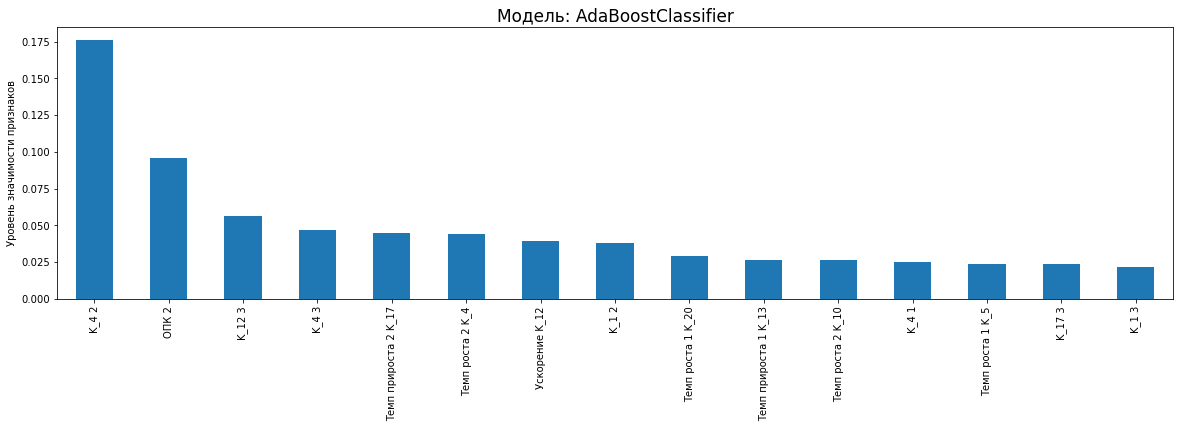

In [23]:
model_GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_GB.fit(data[importances_feature_20[feat]], target)
GB_feaches = pd.Series(model_GB.feature_importances_)
GB_feaches.index = data[importances_feature_20[feat]].columns
GB_feaches = GB_feaches.sort_values(ascending=False)
selection_feature_of_models['GradientBoostingClassifier'] = GB_feaches

GB_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: AdaBoostClassifier', fontsize = 17)
plt.show()   

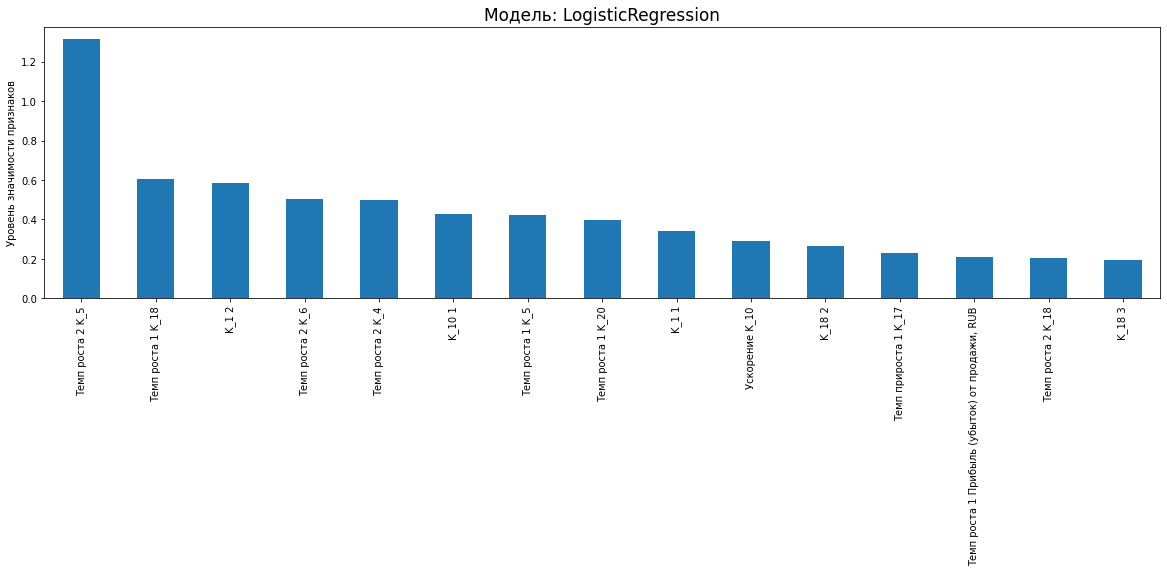

In [24]:
model_LR = LogisticRegression( max_iter=2000, random_state=42)
model_LR.fit(data[importances_feature_20[feat]], target)
LR_feaches = pd.Series(model_LR.coef_[0])
LR_feaches.index = data[importances_feature_20[feat]].columns
LR_feaches = LR_feaches.sort_values(ascending=False)
selection_feature_of_models['LogisticRegression'] = LR_feaches

LR_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: LogisticRegression', fontsize = 17)
plt.show() 

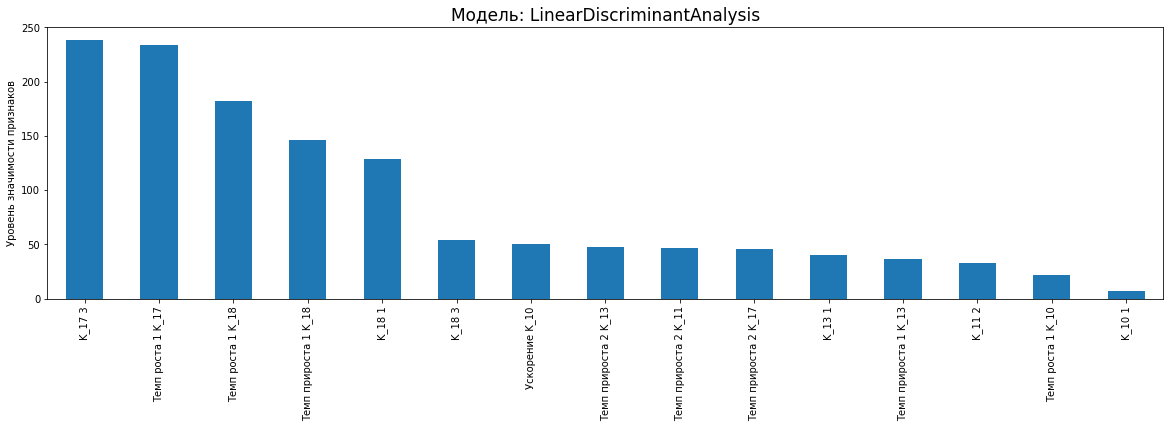

In [25]:
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(data[importances_feature_20[feat]], target)
LDA_feaches = pd.Series(model_LDA.coef_[0])
LDA_feaches.index = data[importances_feature_20[feat]].columns
LDA_feaches = LDA_feaches.sort_values(ascending=False)
selection_feature_of_models['LinearDiscriminantAnalysis'] = LDA_feaches

LDA_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: LinearDiscriminantAnalysis', fontsize = 17)
plt.show() 

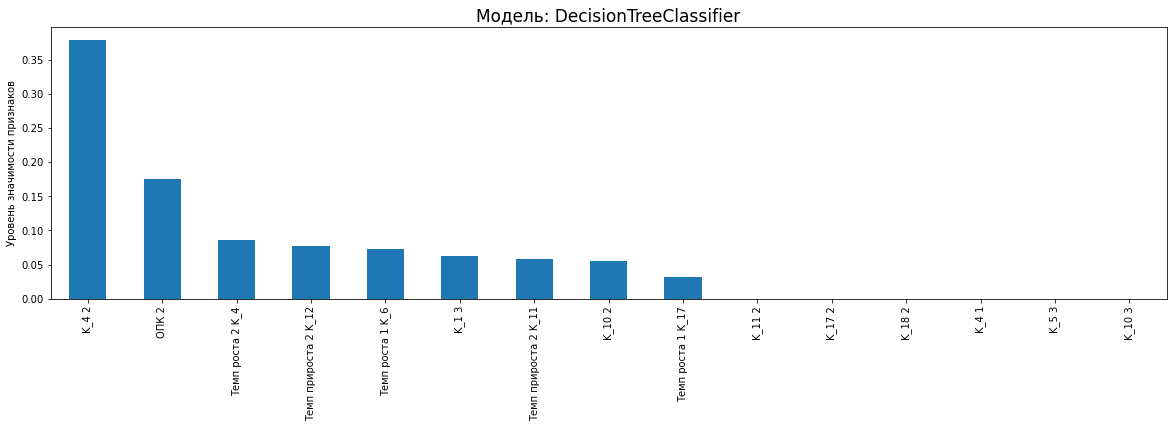

In [26]:
model_CART = DecisionTreeClassifier(random_state=42)
model_CART.fit(data[importances_feature_20[feat]], target)
CART_feaches = pd.Series(model_CART.feature_importances_)
CART_feaches.index = data[importances_feature_20[feat]].columns
CART_feaches = CART_feaches.sort_values(ascending=False)
selection_feature_of_models['DecisionTreeClassifier'] = CART_feaches

CART_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: DecisionTreeClassifier', fontsize = 17)
plt.show()

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


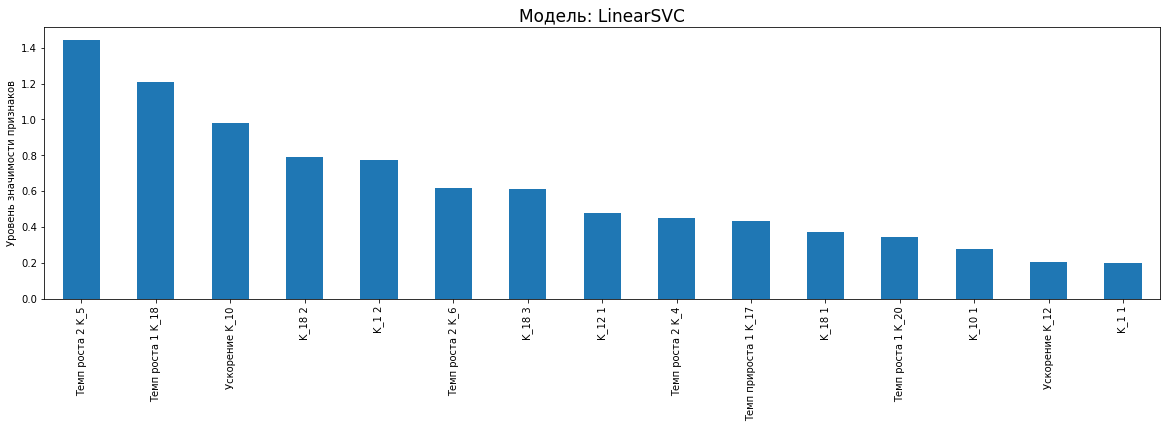

In [27]:
model_LSVC = LinearSVC(max_iter=100000, random_state=42)
model_LSVC.fit(data[importances_feature_20[feat]], target)
LSVC_feaches = pd.Series(model_LSVC.coef_[0])
LSVC_feaches.index = data[importances_feature_20[feat]].columns
LSVC_feaches = LSVC_feaches.sort_values(ascending=False)
selection_feature_of_models['LinearSVC'] = LSVC_feaches

LSVC_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: LinearSVC', fontsize = 17)
plt.show()

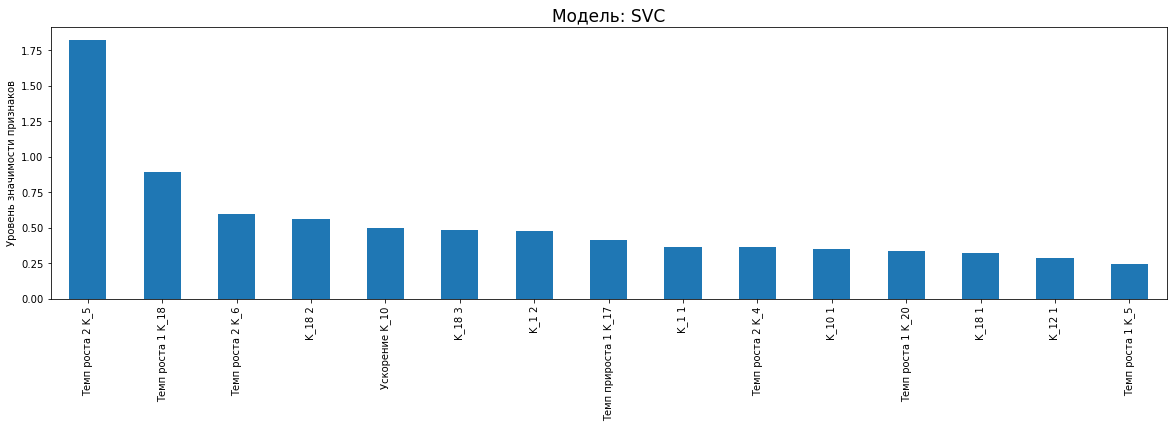

In [28]:
model_SVC = SVC(kernel='linear', random_state=42)
model_SVC.fit(data[importances_feature_20[feat]], target)
SVC_feaches = pd.Series(model_SVC.coef_[0])
SVC_feaches.index = data[importances_feature_20[feat]].columns
SVC_feaches = SVC_feaches.sort_values(ascending=False)
selection_feature_of_models['SVC'] = SVC_feaches

SVC_feaches[:i].plot.bar(figsize=(20,5))
plt.ylabel('Уровень значимости признаков')
plt.title('Модель: SVC', fontsize = 17)
plt.show()  

In [29]:
selection_feature = []
for key, value in selection_feature_of_models.items():
    selection_feature = selection_feature + list(value.index[:i])
 

In [30]:
selection_feature = dict((x, selection_feature.count(x)) for x in set(selection_feature) if selection_feature.count(x) > 1)

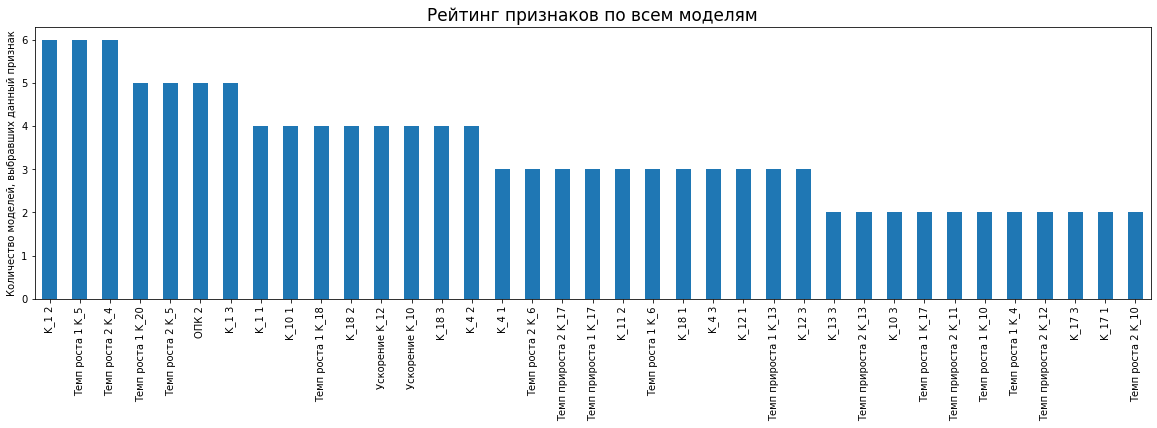

In [31]:
rating_feature = pd.Series(selection_feature).sort_values(ascending=False)
rating_feature.plot.bar(figsize=(20,5))
plt.ylabel('Количество моделей, выбравших данный признак')
plt.title('Рейтинг признаков по всем моделям', fontsize = 17)
plt.show()  

Ранжирование признаков изменилось.